# Customer Segmentation using K-means Clustering
By- Rhushikesh Ugemuge 

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(context= "notebook", palette= "Spectral", style= "darkgrid", font_scale = 1.5, color_codes = True)

In [4]:
df = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')

In [7]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [9]:
df.shape

(200, 4)

In [11]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)

In [15]:
X = df.iloc[:, [2,3]].values

In [17]:
pip install --upgrade scikit-learn threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

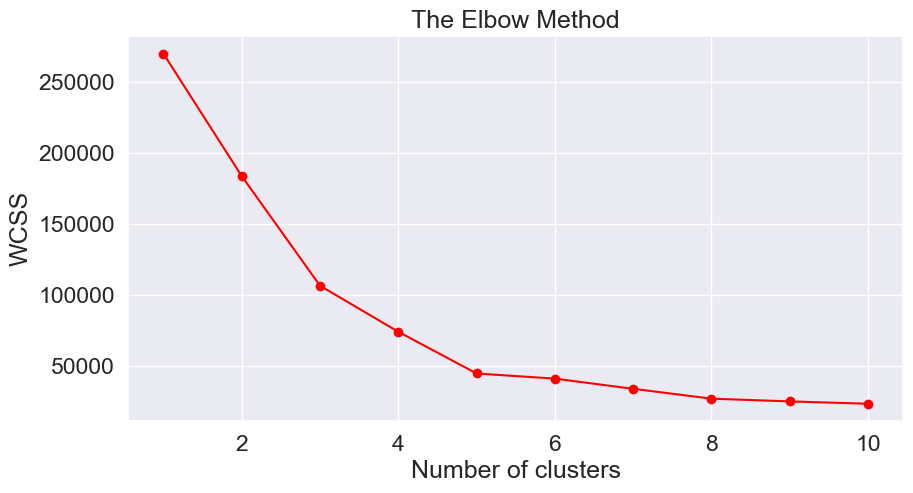

In [19]:
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
y_kmeans = kmeans.fit_predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

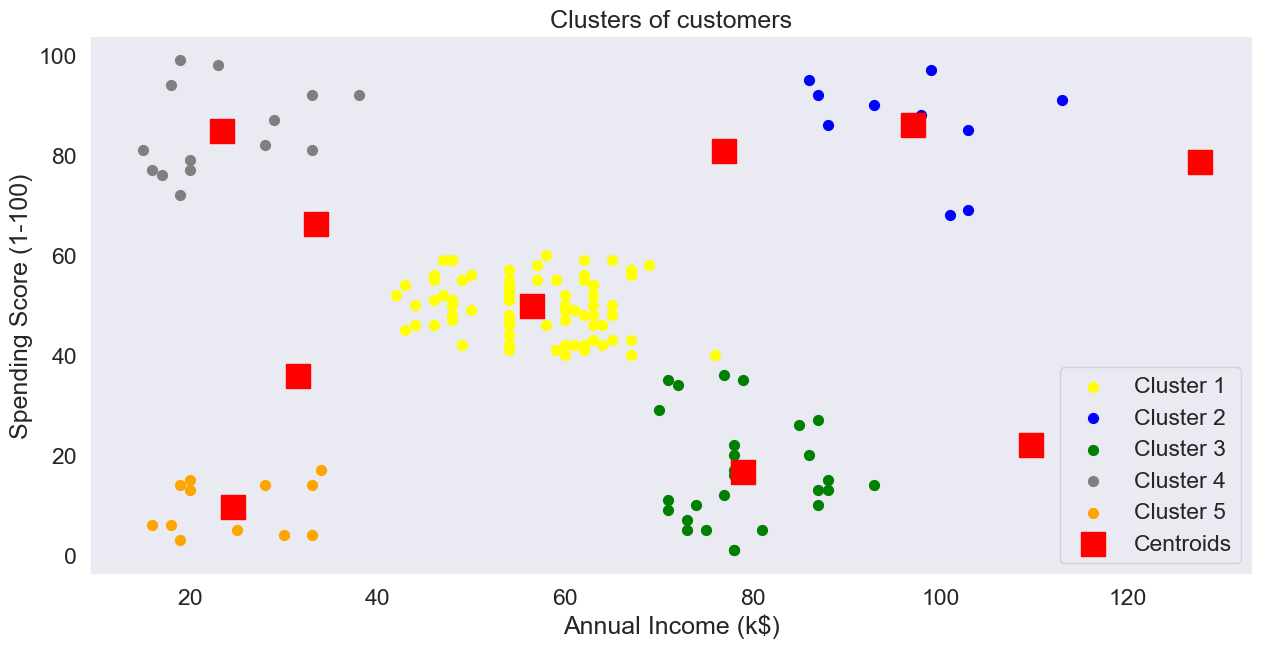

In [21]:
# Visualizing the clusters
plt.figure(figsize=(15,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'red', label = 'Centroids', s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show

In [22]:
# Applying K-means with 5 clusters
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Adding the cluster labels to the original dataset
df['Cluster'] = clusters

# Displaying the first few rows with cluster labels
df.head(10)

,Genre,Age,Annual_Income_(k$),Spending_Score,Cluster
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4
6,Female,22,17,76,2
7,Female,35,18,6,4
8,Female,23,18,94,2
9,Male,64,19,3,4
